<a href="https://colab.research.google.com/github/khurramahmed/diseaseprediction/blob/main/diseaseprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [46]:
trainurl = 'https://raw.githubusercontent.com/khurramahmed/diseaseprediction/main/Training.csv'

In [57]:
train = pd.read_csv(trainurl)
train = train.iloc[:,0:133]

In [58]:
train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [59]:
def Encoder(train):
          columnsToEncode = list(train.select_dtypes(include=['category','object']))
          le = LabelEncoder()
          for feature in columnsToEncode:
              try:
                  train[feature] = le.fit_transform(train[feature])
              except:
                  print('Error encoding '+feature)
          return train

In [ ]:
train = Encoder(train)
train.head()

In [ ]:
train.isnull()

In [64]:
y = train.iloc[:,-1] # Training labels

In [67]:
x = train.iloc[:,0:132] # Training features

In [ ]:
x.head()

In [ ]:
y.head()

In [71]:
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) # Higher the score, more important is the feature towards explaining the output variable.

[0.01693843 0.00777579 0.00845196 0.00586256 0.00641083 0.01033651
 0.01282122 0.01150334 0.00445039 0.00435898 0.00642814 0.01475135
 0.00608685 0.00714355 0.01352153 0.00052648 0.00081107 0.00024846
 0.00052399 0.01167318 0.0029636  0.00259073 0.00672897 0.00047775
 0.00909909 0.01252056 0.00578636 0.00853933 0.01208078 0.00605327
 0.00157465 0.00948402 0.00839984 0.01445055 0.01198739 0.01045805
 0.01116653 0.00566578 0.0040108  0.01022333 0.0142932  0.01333521
 0.00120809 0.01588072 0.00193252 0.         0.00664989 0.00459469
 0.01059915 0.00225141 0.00700551 0.00277278 0.00375954 0.00348767
 0.00301977 0.00323219 0.01387358 0.00473873 0.01078623 0.00596794
 0.00431614 0.00608358 0.00613886 0.00940235 0.00607048 0.00557862
 0.00326096 0.00536239 0.00489881 0.0003905  0.00043935 0.00437285
 0.00636247 0.00679853 0.0051877  0.00591168 0.00229773 0.0093171
 0.00835    0.01096663 0.01276648 0.00368734 0.0024464  0.00803222
 0.00343111 0.01003271 0.0148148  0.00472279 0.00574875 0.00998

In [72]:
importance = pd.Series(model.feature_importances_, index = x.columns)

In [73]:
importance.nlargest(20).index

Index(['muscle_pain', 'itching', 'yellowing_of_eyes', 'unsteadiness',
       'vomiting', 'altered_sensorium', 'dark_urine', 'diarrhoea',
       'chest_pain', 'lack_of_concentration', 'abnormal_menstruation',
       'fatigue', 'mild_fever', 'joint_pain', 'mucoid_sputum',
       'muscle_weakness', 'high_fever', 'increased_appetite',
       'passage_of_gases', 'sweating'],
      dtype='object')

<Axes: >

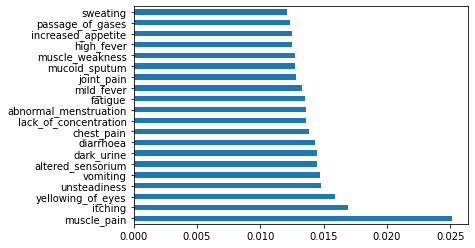

In [74]:
importance.nlargest(20).plot(kind = 'barh')

In [75]:
for_matrix = train[['muscle_pain', 'itching', 'yellowing_of_eyes', 'unsteadiness',
       'vomiting', 'altered_sensorium', 'dark_urine', 'diarrhoea',
       'chest_pain', 'lack_of_concentration', 'abnormal_menstruation',
       'fatigue', 'mild_fever', 'joint_pain', 'mucoid_sputum',
       'muscle_weakness', 'high_fever', 'increased_appetite',
       'passage_of_gases', 'prognosis']]

In [76]:
for_matrix.head()

,muscle_pain,itching,yellowing_of_eyes,unsteadiness,vomiting,altered_sensorium,dark_urine,diarrhoea,chest_pain,lack_of_concentration,abnormal_menstruation,fatigue,mild_fever,joint_pain,mucoid_sputum,muscle_weakness,high_fever,increased_appetite,passage_of_gases,prognosis
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15


In [77]:
corrmat = for_matrix.corr()
corr_important_features = corrmat.index

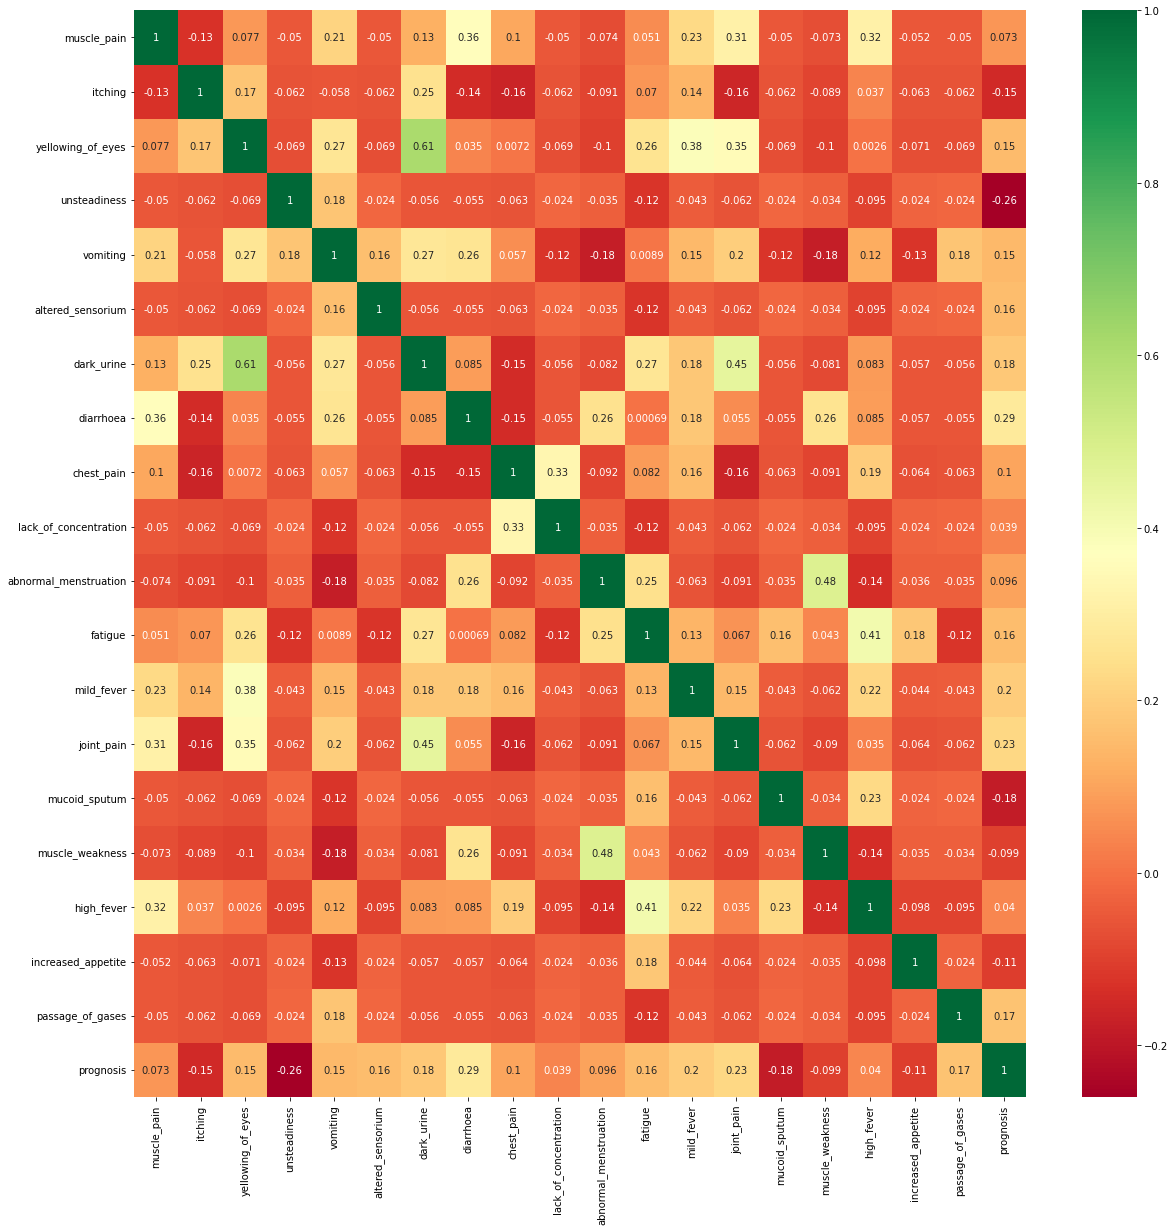

In [78]:
plt.figure(figsize = (20,20))
corr_heatmap = sns.heatmap(for_matrix[corr_important_features].corr(), annot = True, cmap = 'RdYlGn')

In [ ]:
# Variables with high correlation to prognosis are itching unsteadiness (-0.26), diarrhoea (0.29), mild_fever (0.2), and joint_pain (0.23)